# 1. Importation des bibliothèques

In [1]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Importation des données

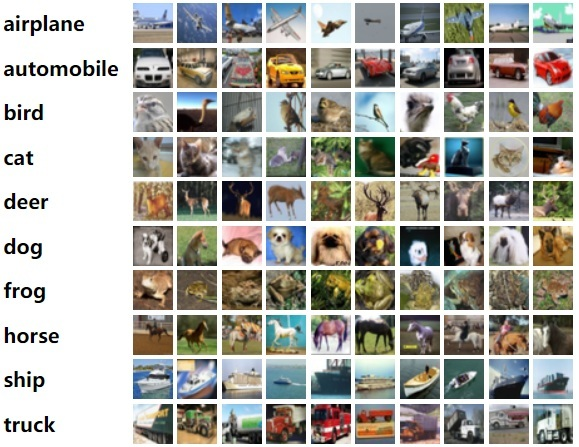

In [2]:
(X_train, X_label), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)
print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


# 3. Encoder-Decoder

In [4]:
# Définir la taille de l'image d'entrée (32x32x3 pour CIFAR-10)
input_img = Input(shape=(32, 32, 3))  # largeur=32, longueur=32, 3 canaux (RGB)

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)  # 16 filtres 3x3
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)  # 8 filtres 3x3
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)  # 8 filtres 3x3
encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)  # Encodage final

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)  # Inverse de la dernière couche d'encodeur
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)  # Inverse de la deuxième couche d'encodeur
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)  # Inverse de la première couche d'encodeur
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Sortie avec 3 canaux (RGB)

# Modèle autoencodeur
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Résumé du modèle
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (MaxPooling2D)               │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 3)           │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

Remarques:
- l'input et l'output ont les mêmes dimensions (32x32x3).
- le latent space est de 4x4x8 = 128.

# 4. Affichage d'une image d'entraînement

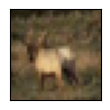

In [8]:
plt.figure(figsize=(40,4))

# display original images
ax = plt.subplot(3, 20, 3)
plt.imshow(X_train[3].reshape(32, 32,3))

#plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# 5. Entrainement du modèle

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 94s 455ms/step - accuracy: 0.4419 - loss: 0.6551 - val_accuracy: 0.4496 - val_loss: 0.6055
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 461ms/step - accuracy: 0.4934 - loss: 0.6014 - val_accuracy: 0.5920 - val_loss: 0.5945
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 461ms/step - accuracy: 0.5947 - loss: 0.5923 - val_accuracy: 0.6139 - val_loss: 0.5915
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 92s 468ms/step - accuracy: 0.6126 - loss: 0.5893 - val_accuracy: 0.6129 - val_loss: 0.5887
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 89s 456ms/step - accuracy: 0.6185 - loss: 0.5874 - val_accuracy: 0.6197 - val_loss: 0.5875
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 458ms/step - accuracy: 0.6210 - loss: 0.5858 - val_accuracy: 0.6107 - val_loss: 0.5864
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 452ms/step - accuracy: 0.6253 - loss: 0.5850 - val_accuracy: 0.6341 - val_loss: 0.5857
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 142s 450ms/step - accuracy: 0.6288 - lo

In [14]:
predicted = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step


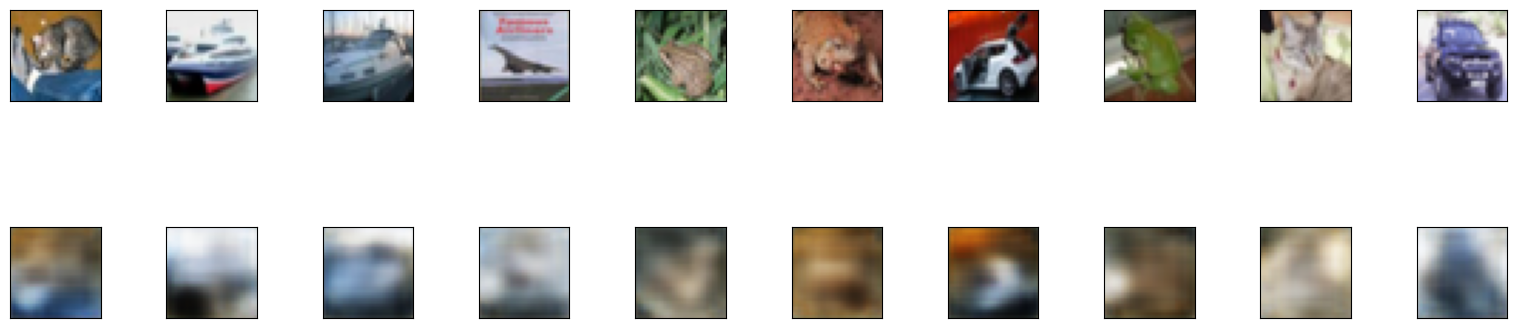

In [15]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()